# Introdução à Analise de Sinais e Sistemas utilizando Python

## Plotando sinais de tempo contínuo

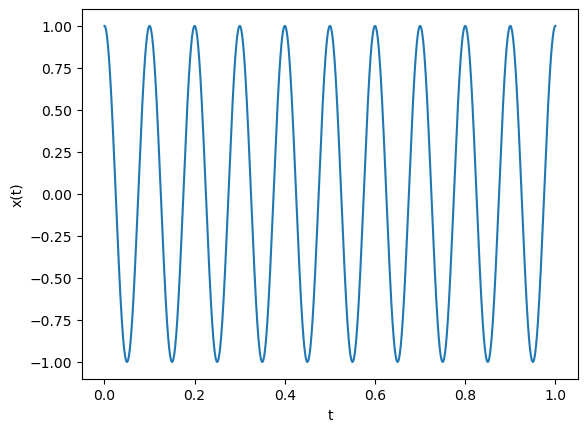

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,1,1e-4)
x = np.cos(2*np.pi*10*t)

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

Vamos plotar o degrau unitário de tempo contínuo. Relembrando:
$$
u(t) = \begin{cases}
1 & t \geq 0 \\
0 & \mathrm{c.c.}
\end{cases}
$$

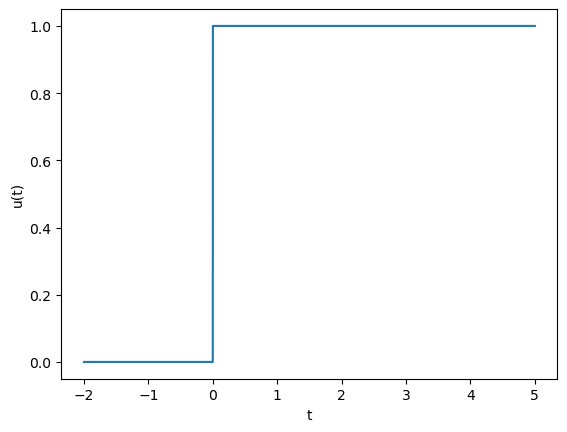

In [13]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-2,5,1e-4)
x = 1*(t>=0);

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.show()

Vamos gerar diferentes sinais exponenciais reais, ou seja:
$$
x(t) = e^{at}
$$
considerando: (a) $a= 1,2$, (b) $a = -1,2$. Vamos verificar o comportamento de crescimento ou decaimento para cada caso.

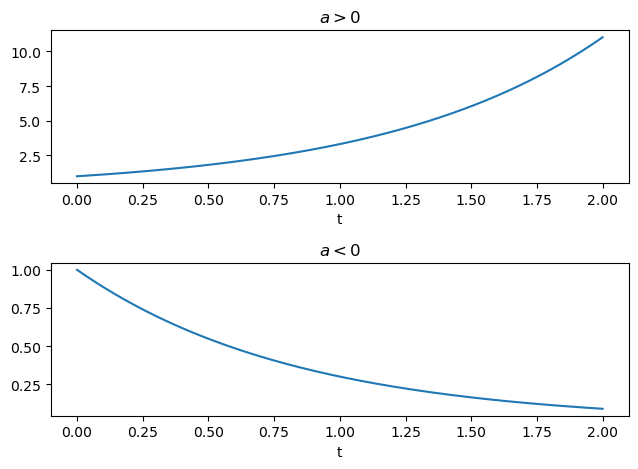

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,2,1e-4)
x1 = np.exp(1.2*t)
x2 = np.exp(-1.2*t)

plt.subplot(2,1,1)
plt.plot(t,x1)
plt.xlabel('t')
plt.title('$a > 0$')

plt.subplot(2,1,2)
plt.plot(t,x2)
plt.xlabel('t')
plt.title('$a < 0$')

plt.tight_layout()
plt.show()

## Operações com Sinais

### Operações Envolvendo a Amplitude

Dado os seguintes sinais:
$$
x_1(t) = \sin (10\pi t)
$$
$$
x_2(t) = u(t)
$$
$$
x_3(t) = e^{-2t}
$$
Determine os seguintes sinais: (a) $x_1(t) + x_3(t)$, (b) $2x_1(t)$, (c) $x_1(t)x_2(t)$ e (d) $1,5x_1(t) + x_2(t) + 2,5x_3(t)$

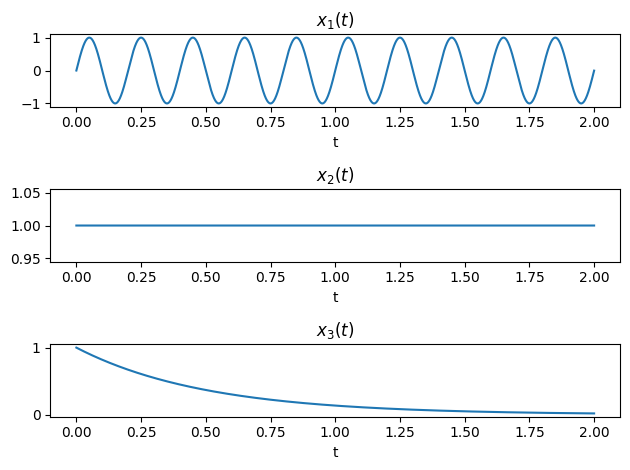

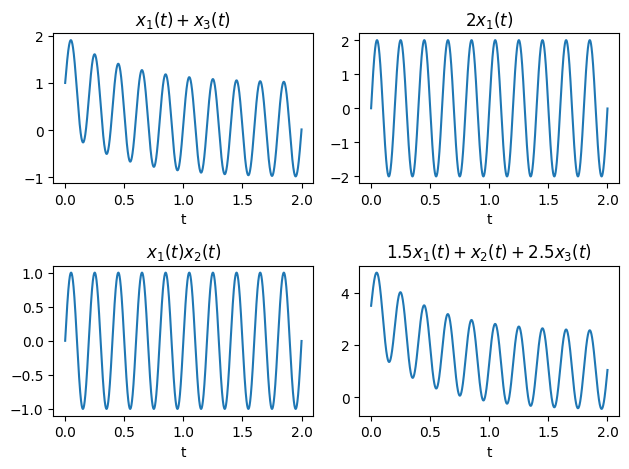

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Ts = 1e-4
t = np.arange(0,2,Ts)
x1 = np.sin(10*np.pi*t)
x2 = 1*(t>=0)
x3 = np.exp(-2*t)

xadd = x1 + x3
xgain = 2*x1
xmul = x1*x2
xcomb = 1.5*x1 + x2 + 2.5*x3

plt.figure()
plt.subplot(3,1,1)
plt.plot(t,x1)
plt.xlabel('t')
plt.title('$x_1(t)$')

plt.subplot(3,1,2)
plt.plot(t,x2)
plt.xlabel('t')
plt.title('$x_2(t)$')

plt.subplot(3,1,3)
plt.plot(t,x3)
plt.xlabel('t')
plt.title('$x_3(t)$')
plt.tight_layout()

plt.figure()     #Criando uma nova figura
plt.subplot(2,2,1)
plt.plot(t,xadd)
plt.xlabel('t')
plt.title('$x_1(t) + x_3(t)$')

plt.subplot(2,2,2)
plt.plot(t,xgain)
plt.xlabel('t')
plt.title('$2x_1(t)$')

plt.subplot(2,2,3)
plt.plot(t,xmul)
plt.xlabel('t')
plt.title('$x_1(t)x_2(t)$')

plt.subplot(2,2,4)
plt.plot(t,xcomb)
plt.xlabel('t')
plt.title('$1.5x_1(t) + x_2(t) + 2.5x_3(t)$')
plt.tight_layout()

plt.show()

### Operações Envolvendo o Tempo

Dado o seguinte sinal:

$$
x(t) = \begin{cases}
t + 1 & -1 \leq t \leq 0 \\
-0,5t + 1 & 0 < t \leq 2 \\
0 & \mathrm{c.c.}
\end{cases}
$$

Determine: (a) $x(t/2)$, (b) $x(2t)$, (c) $x(-t)$, (d) $x(t-2)$

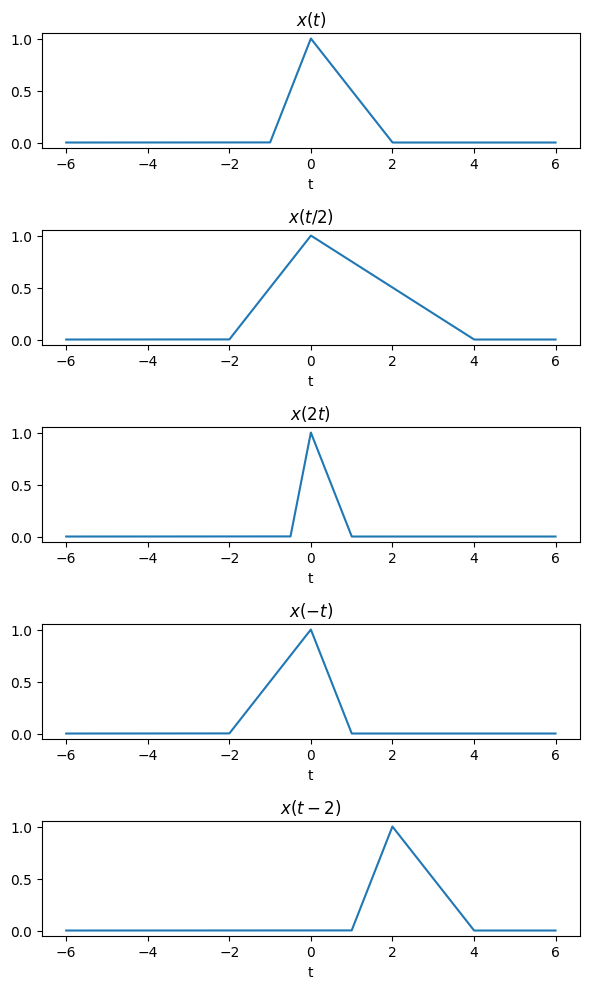

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def meusinal(t):
    x = (t+1)*(np.logical_and(t>=-1,t<=0)) + (-0.5*t+1)*(np.logical_and(t>0,t<=2))
    return x

t = np.arange(-6,6,1e-4)
x = meusinal(t)

x1 = meusinal(t/2)
x2 = meusinal(2*t)
x3 = meusinal(-t)
x4 = meusinal(t-2)

plt.figure(figsize=(6,10))
plt.subplot(5,1,1)
plt.plot(t,x)
plt.xlabel('t')
plt.title('$x(t)$')

plt.subplot(5,1,2)
plt.plot(t,x1)
plt.xlabel('t')
plt.title('$x(t/2)$')

plt.subplot(5,1,3)
plt.plot(t,x2)
plt.xlabel('t')
plt.title('$x(2t)$')

plt.subplot(5,1,4)
plt.plot(t,x3)
plt.xlabel('t')
plt.title('$x(-t)$')

plt.subplot(5,1,5)
plt.plot(t,x4)
plt.xlabel('t')
plt.title('$x(t-2)$')

plt.tight_layout()
plt.show()

## Energia de Sinais

Determine, computacionamente, a energia do seguinte sinal de tempo contínuo,

$$
x(t) = u(t) - u(t-1)
$$
 
Compare com o resultado analítico $E_x = 1$.

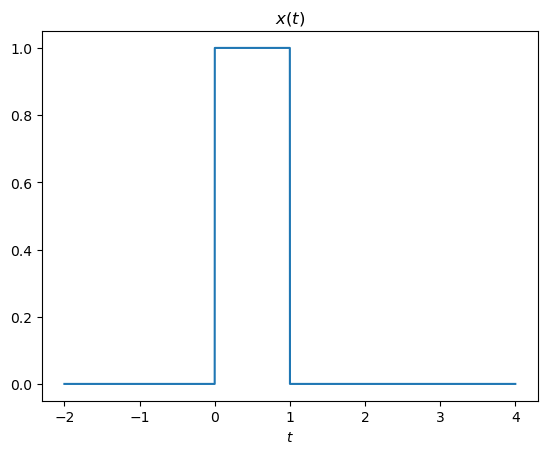

Energia (computacional) =  1.0
Energia (analítica) =  1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Ts = 1e-4
t = np.arange(-2,4,Ts)
u = 1*(t>=0)
u1 = 1*(t>=1)
x = u - u1

plt.plot(t,x)
plt.xlabel('$t$')
plt.title('$x(t)$')
plt.show()

Ex = Ts*np.sum(x**2)
print('Energia (computacional) = ', Ex)
print('Energia (analítica) = ',1)

## Sistemas de Tempo Contínuo e Tempo Discreto

Implemente um sistema modulador em amplitude, definido pela seguinte relação entrada-saída:

$$
y(t) = x(t)\cos(2\pi F_c t)
$$

sendo $F_c$ a frequência da portadora e $x(t)$ o sinal de entrada. Simule considerando $F_c = 10$kHz e $x(t) = \cos(2\pi F_m t)$, sendo $F_m = 500$ Hz. Utilize como passo $10^{-6}$.

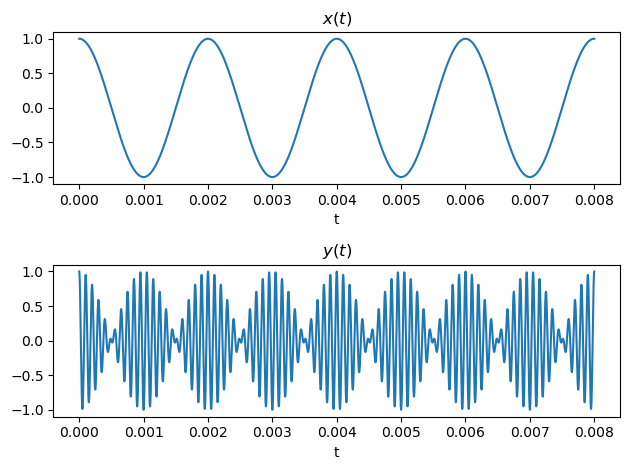

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,8e-3,1e-6)

Fm = 500
x = np.cos(2*np.pi*Fm*t)

Fc = 10000
y = np.cos(2*np.pi*Fc*t)*x

plt.subplot(2,1,1)
plt.plot(t,x)
plt.xlabel('t')
plt.title('$x(t)$')

plt.subplot(2,1,2)
plt.plot(t,y)
plt.xlabel('t')
plt.title('$y(t)$')

plt.tight_layout()
plt.show()

## Sistemas Lineares e Invariantes no Tempo

Determine a saída de um sistema LTI com resposta ao impulso:
$$
h(t) = \begin{cases}
t, & 0 < t < 2 \\
0, & \mathrm{c.c.}
\end{cases}
$$
em que a entrada é:
$$
x(t) = \begin{cases}
1, & 0 < t < 1 \\
0, & \mathrm{c.c.}
\end{cases}
$$

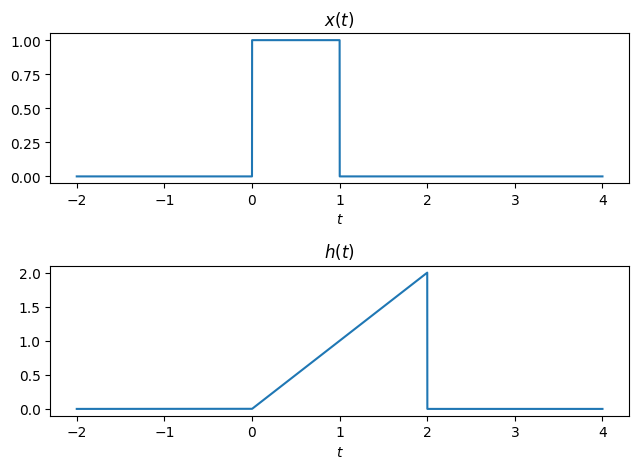

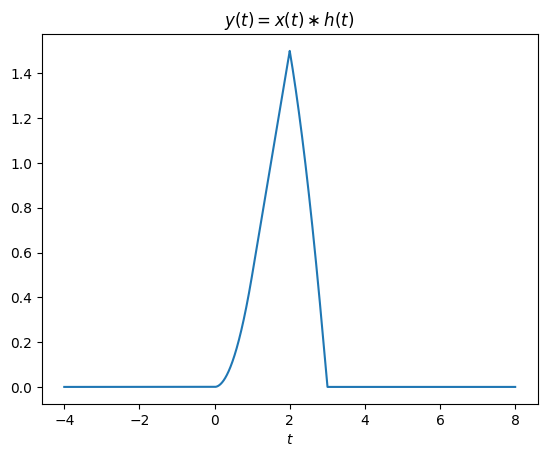

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Ts = 1e-4
t_min = -2
t_max = 4
t = np.arange(t_min,t_max,Ts)

x = ((0 < t) & (t < 1))*1
h = ((0 < t) & (t < 2))*t

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x)
plt.title('$x(t)$')
plt.xlabel('$t$')
plt.subplot(2,1,2)
plt.plot(t,h)
plt.title('$h(t)$')
plt.xlabel('$t$')
plt.tight_layout()

y = Ts*np.convolve(x,h)
ty = np.arange(2*t_min,2*t_max-Ts,Ts)

plt.figure()
plt.plot(ty,y)
plt.title('$y(t) = x(t)\\ast h(t)$')
plt.xlabel('$t$')
plt.show()

O importante é notar que, computacionalmente, a operação de convolução é executada sobre sinais de duração finita. Quando temos sinais de duração infinita, a convolução computacional será igual à convolução real somente no intervalo de tempo dos sinais originais. Por exemplo, determine a saída de um sistema LTI com resposta ao impulso:
$$
h(t) = e^{-2t}u(t)
$$
em que a entrada é:
$$
x(t) = u(t)
$$

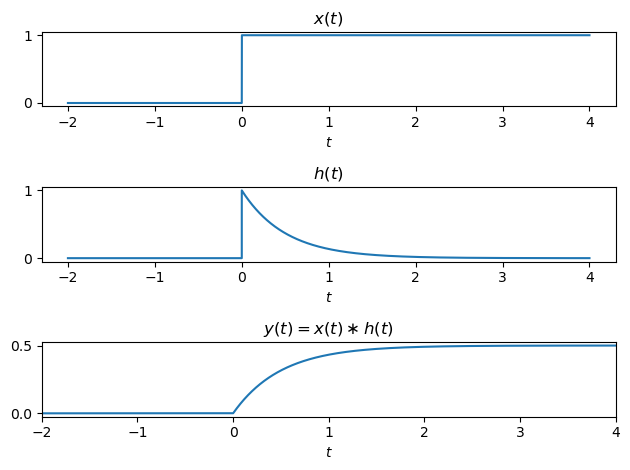

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Ts = 1e-4
t_min = -2;
t_max = 4;
t = np.arange(t_min,t_max,Ts)

h = np.exp(-2*t)*(t>=0)
x = 1*(t>=0)

y = Ts*np.convolve(x,h)
ty = np.arange(2*t_min,2*t_max-Ts,Ts)

plt.subplot(3,1,1)
plt.plot(t,x)
plt.title('$x(t)$')
plt.xlabel('$t$')

plt.subplot(3,1,2)
plt.plot(t,h)
plt.title('$h(t)$')
plt.xlabel('$t$')

plt.subplot(3,1,3)
plt.plot(ty,y)
plt.xlim([-2,4])
plt.title('$y(t) = x(t) \\ast h(t)$')
plt.xlabel('$t$')
plt.tight_layout()
plt.show()

## Equações Diferenciais Ordinárias

Vamos considerar um sistema de tempo contínuo descrito pela seguinte equação diferencial:

$$
\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) = 6x(t)
$$

Inicialmente devemos criar a equação diferencial. Para simplificar, vamos primeiro determinar a resposta natural dessa equação, ou seja, considerando $x(t) = 0$ temos:

$$
\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) = 0
$$

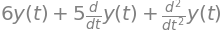

In [17]:
import sympy as sympy
sympy.init_printing()    #Melhora a apresentacao das ED

t = sympy.symbols('t')   #Cria a variavel simbolica t
y = sympy.Function('y')  #Cria uma funcao y

eq = sympy.diff(y(t),t,t) + 5*sympy.diff(y(t),t) + 6*y(t)  #Cria a ED. Quando usa t,t é a derivada segunda
eq

In [18]:
sympy.dsolve(eq)

Verifique que nesse caso, a resposta natural ainda está em função das constantes arbitárias. Vamos complicar um pouco mais e adicionar uma entrada, no caso $x(t) = \frac{2}{3}e^{-t}$. É importante frisar que o Python só consegue resolver equações diferenciais homogêneas, ou seja, quando o lado direito é igual a zero. Todavia, se substituirmos $x(t)$ na equação diferencial vemos que:


$$
\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) = 6\left(\frac{2}{3}e^{-t}\right)
$$

o que é a mesma coisa de:

$$
\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) - 6\left(\frac{2}{3}e^{-t}\right) = 0
$$

É essa equação que deveremos implementar.

In [20]:
eq = sympy.diff(y(t),t,t) + 5*sympy.diff(y(t),t) + 6*y(t) - 6*(2/3*sympy.exp(-t))
sympy.dsolve(eq)

Ao resolvermos, note que a resposta já engobla a resposta forçada + resposta natural. Para resolver adicionando condições iniciais, podemos complementar o comando através da diretiva `ics`. Se quisermos calcular a resposta considerando as condições iniciais $y(0) = 10$ e $\dot{y}(0) = -2$, poderemos fazer:

In [21]:
sympy.dsolve(eq,ics={y(t).subs(t,0):10, y(t).diff(t).subs(t, 0):-2})

Verifique que essa é a mesma resposta quando utilizamos o método clássico! Em resumo, o código abaixo resolve a seguinte equação diferencial:

$$
\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) = 6x(t)
$$

com entrada $x(t) = \frac{2}{3}e^{-t}$ e condições iniciais $y(0) = 10$ e $\dot{y}(0) = -2$.

In [22]:
import sympy as sympy
sympy.init_printing()    #Melhora a apresentacao das ED

t = sympy.symbols('t')   #Cria a variavel simbolica t
y = sympy.Function('y')  #Cria uma funcao y

eq = sympy.diff(y(t),t,t) + 5*sympy.diff(y(t),t) + 6*y(t) - 6*(2/3*sympy.exp(-t))
sol = sympy.dsolve(eq,ics={y(t).subs(t,0):10, y(t).diff(t).subs(t, 0):-2})
sol

A resposta ao impulso de um sistema pode ser determinada de forma semelhante, utilizando a método de casamento de impulso. Por exemplo, determine a resposta ao impulso do sistema descrito pela seguinte equação diferencial:

$$
\frac{d^2y(t)}{dt^2} + 3\frac{dy(t)}{dt} + 2y(t) = \frac{dx(t)}{dt}
$$

In [23]:
import sympy as sympy
sympy.init_printing()    #Melhora a apresentacao das ED

t = sympy.symbols('t')   #Cria a variavel simbolica t
y = sympy.Function('y')  #Cria uma funcao y

eq = sympy.diff(y(t),t,t) + 3*sympy.diff(y(t),t) + 2*y(t)   #Desejamos apenas a resposta natural
yn = sympy.dsolve(eq,ics={y(t).subs(t,0):0, y(t).diff(t).subs(t, 0):1})
h = sympy.diff(yn.rhs,t)
h


## Análise de Estabilidade de Sistemas LTIC 

Determine se os seguintes sistemas LTIC de tempo contínuo são estáveis ou não.

(a) $\frac{d^2y(t)}{dt^2} + 3\frac{dy(t)}{dt} + 2y(t) = \frac{dx(t)}{dt} - 3x(t)$

(b) $\frac{d^2y(t)}{dt^2} - y(t) = x(t)$

In [8]:
import numpy as np

p1 = [1,3,2]
p2 = [1,0,-1]

roots_p1 = np.roots(p1)
print(roots_p1)

roots_p2 = np.roots(p2)
print(roots_p2)

[-2. -1.]
[-1.  1.]
